TITANIC

https://www.kaggle.com/competitions/titanic/overview

```
survival	Survival		0 = No, 1 = Yes
pclass		Ticket class		1 = 1st, 2 = 2nd, 3 = 3rd
sex		Sex	
Age		Age in years	
sibsp		# of siblings / spouses aboard the Titanic	
parch		# of parents / children aboard the Titanic	
ticket		Ticket number	
fare		Passenger fare	
cabin		Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
```

데이터 분석을 잘하는사람

데이터 도메인

인사이트능력

In [4]:
import numpy as np
import pandas as pd

# 데이터 가져오기

In [5]:
train = pd.read_csv('./train.csv')
#train.head(10)
train.info()
# train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.columns = train.columns.str.lower()
train.head(1)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


# 결측치 확인

In [42]:
train.isna().sum()[train.isna().sum()>0].sort_values(ascending=False)

cabin       687
age         177
embarked      2
dtype: int64

출력결과를 다음곽 ㅏㅌ이 출력

col        cnt         nan_cnt         nan_rate

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [226]:
col = train.columns.values
col

array(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'], dtype=object)

In [227]:
nan_cnt = train.isna().sum().values
nan_cnt

array([  0,   0,   0,   0,   0, 177,   0,   0,   0,   0, 687,   2],
      dtype=int64)

In [228]:
cnt = train.count().values
cnt

array([891, 891, 891, 891, 891, 714, 891, 891, 891, 891, 204, 889],
      dtype=int64)

In [229]:
nan_rate = nan_cnt/train.shape[0]*100
nan_rate

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       19.86531987,  0.        ,  0.        ,  0.        ,  0.        ,
       77.1043771 ,  0.22446689])

In [231]:
res = pd.DataFrame(col, columns=['col'])
res['cnt'] = cnt
res['nan_cnt'] = nan_cnt
res['nan_rate'] = list(map(lambda x:str(x)+'%', nan_rate.round(2)))
res.sort_values('nan_rate', ascending=False)

,col,cnt,nan_cnt,nan_rate
10,cabin,204,687,77.1%
5,age,714,177,19.87%
11,embarked,889,2,0.22%
0,passengerid,891,0,0.0%
1,survived,891,0,0.0%
2,pclass,891,0,0.0%
3,name,891,0,0.0%
4,sex,891,0,0.0%
6,sibsp,891,0,0.0%
7,parch,891,0,0.0%


# 중복값 확인

In [150]:
# distinct
train['sex'].unique()

array(['male', 'female'], dtype=object)

In [167]:
train['sex'].nunique()

2

In [155]:
train['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [165]:
len(train['age'].unique())
train['age'].nunique() # 널값은 빼는듯?

88

In [209]:
train.nunique()

passengerid    891
survived         2
pclass           3
name           891
sex              2
age             88
sibsp            7
parch            7
ticket         681
fare           248
cabin          147
embarked         3
dtype: int64

# EDA

탐색적 데이터 분석

시각화

In [2]:
#! pip install matplotlib

In [3]:
import matplotlib.pyplot as plt

## passengerid

분석에 필요없는 컬럼 삭제

In [277]:
# train.drop(['passengerid'], axis=1, inplace=True)
train

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## survived

In [233]:
train['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

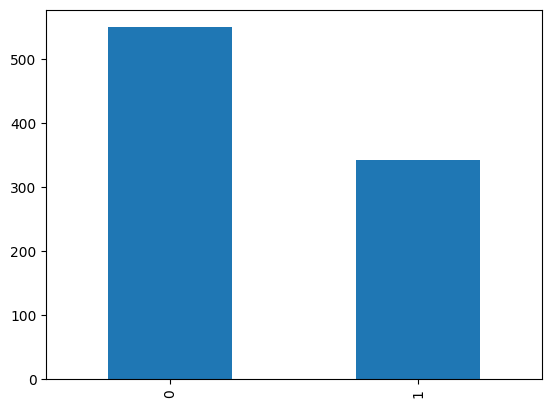

In [260]:
train['survived'].value_counts().plot(kind='bar')
plt.show()

## pclass

In [283]:
train['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

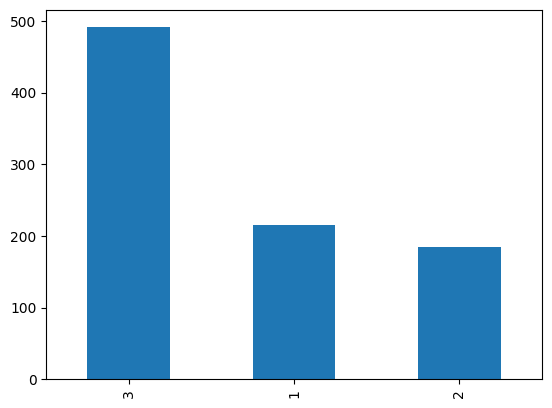

In [287]:
train['pclass'].value_counts().plot(kind='bar')
plt.show()

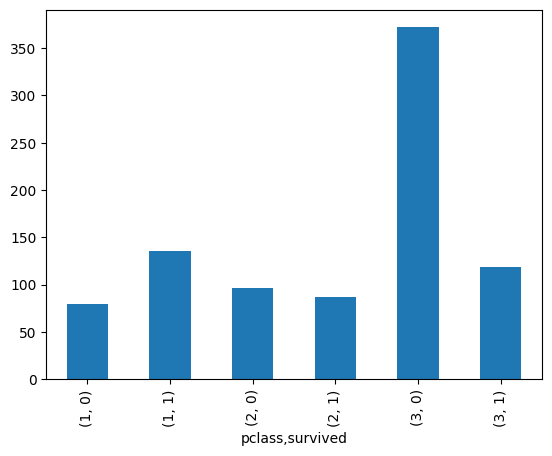

In [290]:
train[['pclass','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

## cabin

In [346]:
train_cabin = train[train['cabin'].notna()==True]
train_cabin.shape

(204, 11)

In [347]:
len(list(map(lambda x:x[0], train_cabin['cabin'].values)))

204

In [348]:
train_cabin['cabin'].str[0]

1      C
3      C
6      E
10     G
11     C
      ..
871    D
872    B
879    C
887    B
889    C
Name: cabin, Length: 204, dtype: object

In [350]:
train_cabin['cabin'] = train_cabin['cabin'].str[0]
train_cabin.head()

C:\Users\ASIA\AppData\Local\Temp\ipykernel_18196\706948252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cabin['cabin'] = train_cabin['cabin'].str[0]


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C,S


In [355]:
train_cabin['cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: cabin, dtype: int64

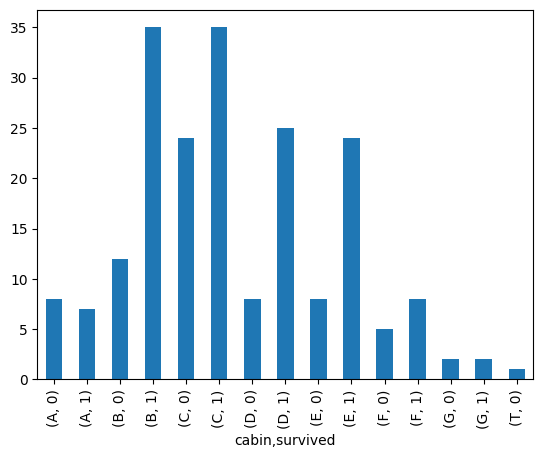

In [356]:
train_cabin[['cabin','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

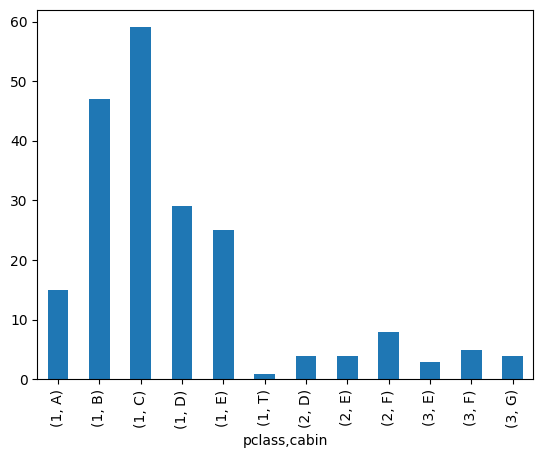

In [360]:
train_cabin[['pclass','cabin']].value_counts().sort_index().plot(kind='bar')
plt.show()